In [5]:
import pickle

In [6]:
trajFile = open('trajectoryParams.pkl', 'r')
trajectories = pickle.load(trajFile)
trajFile.close()

In [7]:
print 'Keys for {} sequences: {}'.format(len(trajectories.keys()), trajectories.keys())

Keys for 25 sequences: ['skating', 'bicycle', 'drunk', 'sphere', 'ball', 'gymnastics', 'hand1', 'hand2', 'diving', 'fish2', 'fish1', 'basketball', 'sunshade', 'polarbear', 'woman', 'bolt', 'surfing', 'tunnel', 'car', 'torus', 'fernando', 'david', 'jogging', 'trellis', 'motocross']


In [1]:
%pylab inline --no-import-all
import numpy
import sklearn.mixture

Populating the interactive namespace from numpy and matplotlib


In [2]:
LENGTH = 60

In [14]:
N_FEATURES = 8

In [29]:
samples = numpy.empty((LENGTH, N_FEATURES))

In [30]:
totalLength = 0
for aSequence in trajectories.keys():
    trajectory = trajectories[aSequence]
    totalLength += trajectory.shape[0]
    print '{} length: {}'.format(aSequence, trajectory.shape)
    for start in numpy.arange(0, trajectory.shape[0]-LENGTH, LENGTH):
        sample = trajectories[aSequence][start:start+LENGTH,:]
        samples = numpy.dstack([samples, sample])
print 'Total length: {}'.format(totalLength)

skating length: (400, 8)
bicycle length: (271, 8)
drunk length: (1210, 8)
sphere length: (201, 8)
ball length: (603, 8)
gymnastics length: (207, 8)
hand1 length: (244, 8)
hand2 length: (267, 8)
diving length: (219, 8)
fish2 length: (310, 8)
fish1 length: (436, 8)
basketball length: (725, 8)
sunshade length: (172, 8)
polarbear length: (371, 8)
woman length: (597, 8)
bolt length: (350, 8)
surfing length: (282, 8)
tunnel length: (731, 8)
car length: (252, 8)
torus length: (264, 8)
fernando length: (292, 8)
david length: (770, 8)
jogging length: (307, 8)
trellis length: (569, 8)
motocross length: (164, 8)
Total length: 10214


In [26]:
samples.shape

(60, 8, 160)

In [27]:
sample.shape

(60, 8)

In [28]:
samples.shape[-1]*LENGTH

9600

In [42]:
flatSample = samples.reshape(LENGTH*N_FEATURES, samples.shape[2]).T

In [43]:
flatSample.shape

(160, 480)

In [45]:
(flatSample.T[:,0]-samples[0:LENGTH,:,0].ravel()).sum()

0.0

In [49]:
MIXTURES = 10

In [50]:
gmm = sklearn.mixture.GMM(n_components=MIXTURES)

In [51]:
%time gmm.fit(flatSample)

CPU times: user 120 ms, sys: 0 ns, total: 120 ms
Wall time: 116 ms


GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=10, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)

In [52]:
%time predictedSample = gmm.sample(n_samples=samples.shape[-1])

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 24.9 ms


In [53]:
def plot_params(path):
    titles = ['$ tx $', '$ ty $', '$ sx $', '$ sy $', '$ \\theta $', '$ \\theta_{pv}$', 'product', 'ratio']
    matplotlib.pyplot.figure()
    matplotlib.pyplot.gcf().subplots_adjust(bottom=0.0, hspace=0.0)
    for i in range(path.shape[1]):
        axes = matplotlib.pyplot.subplot(int(path.shape[1]/2),2,i+1)
        matplotlib.pyplot.plot(path[:,i])
        if i < path.shape[1]-1:
            matplotlib.pyplot.setp( axes.get_xticklabels(), visible=False)
        matplotlib.pyplot.ylabel(titles[i])

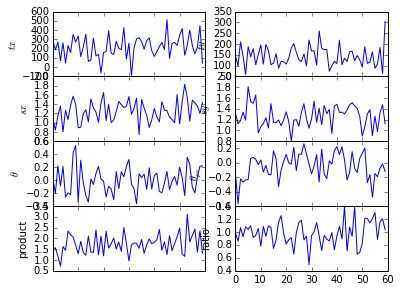

In [55]:
plot_params(predictedSample[20,:].reshape(LENGTH, N_FEATURES))